# Analysis of the Coursera course dataset

For this work we will use Coursera course dataset downloaded from here:<br> 
    https://www.kaggle.com/siddharthm1698/coursera-course-dataset .
The aim of this analysis is to find what courses are most popular among various groups of people, what subject is most popular 
and find more interesting insights as well as to visualize the results to make the data more ease to understand.
The objective is to practice performing basic EDA, practice reading data, performing queries and filtering data using Pandas,
also providing graphical visuals using Matplotlib and Seaborn libraries.

**Note:**<br>
    if you wish to see all dataset rows, please add :<br>
        **pd.set_option('display.max_rows', None)**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("coursea_data.csv")
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Data Cleaning

* Change column 'course_students_enrolled' into float, also replace 'k','m' marking for thousand and million;
* Replace column 'course_students_enrolled, thousands' into easier reading by decreasing values by a thousand.

In [5]:
df["course_students_enrolled"] = (
    df["course_students_enrolled"]
    .replace({"k": "*1e3", "m": "*1e6"}, regex=True)
    .map(pd.eval)
    .astype("float")
)
df["course_students_enrolled, thousands"] = df["course_students_enrolled"] / 1000
df.drop(["Unnamed: 0", "course_students_enrolled"], axis=1, inplace=True)

* Check if there are any missing values;
* Check if there are any duplicates:

In [6]:
df.isna().sum()

course_title                           0
course_organization                    0
course_Certificate_type                0
course_rating                          0
course_difficulty                      0
course_students_enrolled, thousands    0
dtype: int64

In [7]:
df.drop_duplicates(keep="first")

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,"course_students_enrolled, thousands"
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8


### Conlusions about dataset:

The dataset has been changed: dropped unnecessary columns, changed marking for thousand and million to numeric value. 
Further investigation showed no missing values and no duplicated entries.

## Exploratory Data Analysis (EDA)

* Check the overall information about our dataset;
* Check the dataframe size
* checking if indexes and columns are unique

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   course_title                         891 non-null    object 
 1   course_organization                  891 non-null    object 
 2   course_Certificate_type              891 non-null    object 
 3   course_rating                        891 non-null    float64
 4   course_difficulty                    891 non-null    object 
 5   course_students_enrolled, thousands  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 41.9+ KB


In [9]:
df.shape

(891, 6)

In [10]:
df.index.is_unique

True

In [31]:
df.columns.is_unique

True

* Get the overall description of dataset columns

In [32]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
course_title,891,888,Developing Your Musicianship,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_organization,891,154,University of Pennsylvania,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_Certificate_type,891,3,COURSE,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_rating,891.0,NaN,NaN,NaN,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0
course_difficulty,891,4,Beginner,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"course_students_enrolled, thousands",891.0,NaN,NaN,NaN,90.552076,181.936454,1.5,17.5,42.0,99.5,3200.0


As we can see, description shows that numeric columns have outliers, especially the quantity of enrolled students.
The outliers in course_ratings is not so obvious, since the values themselves are very close to each other.
However the course_title shows, that there are courses with duplicated titles. Before considering of eeliminating them,
let's check the list:

In [33]:
df[df.course_title.duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,"course_students_enrolled, thousands"
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54.0
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290.0
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81.0
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39.0


As we can see duplicated values are of different organizations, difficulty, with separate attendance quantity and ratings.
That is a valuable information for our dataset, therefore we keep them as they are.

In [34]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,"course_students_enrolled, thousands"
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320.0


* Detect Outliers (visualization):

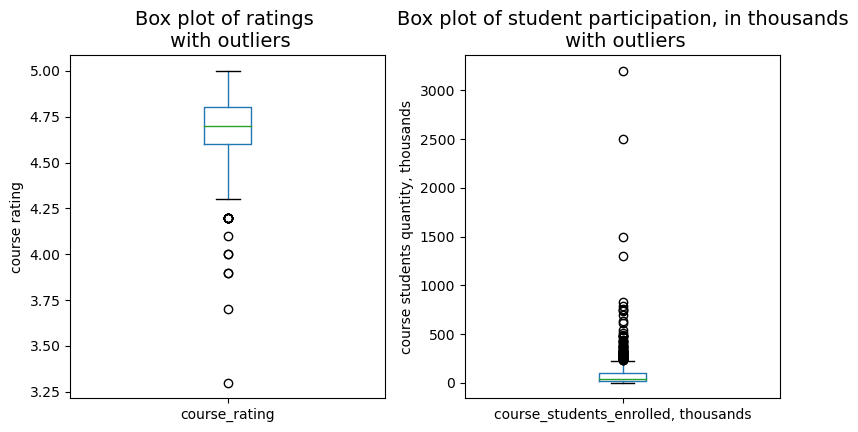

In [35]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
ax = fig.gca()
df[["course_rating"]].boxplot(ax=ax, grid=False)
ax.set_title("Box plot of ratings \n with outliers", fontsize=14)
ax.set_ylabel("course rating")
plt.subplot(2, 2, 2)
ax = fig.gca()
df[["course_students_enrolled, thousands"]].boxplot(ax=ax, grid=False)
ax.set_title(
    "Box plot of student participation, in thousands\n with outliers", fontsize=14
)
ax.set_ylabel("course students quantity, thousands")
plt.tight_layout()

* Detect outliers and lower and upper bound; 
* Collect all outliers into separate DataFrame

In [36]:
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_bound = col[(col < lower_bound) | (col > upper_bound)]
    outl_1 = outliers_bound["course_students_enrolled, thousands"].dropna()
    outl_2 = outliers_bound["course_rating"].dropna()
    outliers = pd.concat([outl_2, outl_1], axis=1)
    return outliers


outliers = detect_outliers(df)
outliers

C:\Users\Gabija\AppData\Local\Temp\ipykernel_8992\219960517.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_bound = col[(col < lower_bound) | (col > upper_bound)]


,course_rating,"course_students_enrolled, thousands"
59,4.2,NaN
182,4.2,NaN
331,4.2,NaN
402,4.2,NaN
413,3.3,NaN
...,...,...
816,NaN,320.0
850,NaN,310.0
859,NaN,280.0
864,NaN,260.0


### Conclusion: 

The given dataset has 891 entries and 6 features: 'course_title', 'course_organization', 'course_Certificate_type',
'course_rating', 'course_difficulty', 'course_students_enrolled, thousands'.<br>
4 columns are with categorical data and 2 columns are with numeric data.<br>
We have separated outliers for 'course_rating','course_students_enrolled, thousands', but did not delete them and in the future
exploration we will check how outliers effect our analysis conclusion.

### How courses are spread according course ratings:

In [37]:
a = (
    df.groupby("course_rating", as_index=True)
    .count()
    .max(axis=1)
    .sort_values(ascending=False)
)
a

course_rating
4.8    256
4.7    251
4.6    168
4.5     80
4.9     68
4.4     34
4.3     15
4.2     10
3.9      2
4.0      2
5.0      2
3.3      1
3.7      1
4.1      1
dtype: int64

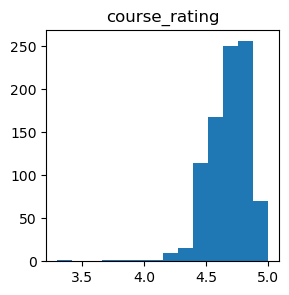

In [38]:
df.hist(column="course_rating", grid=False, bins=14, figsize=(3, 3));

### Conclusion:


As we can see the most courses (256) where rated 4.8, then we have 251 courses with 4.7 ratings. The highest rating is given
only for 2 courses.<br>
As we observe the outliers do not affect much the results as they are not in the range of highest ratings. 

### How courses rating correlate with student participation:

I will use the heatmap() function to create correlation map, plus will set the annotation = True 
that will write the data value in each cell. Here cmap stands for the color map. 
For better readability all values are rounded by 2 decimals.

* **Standard:** On the right side of correlation map, you can see a scale ranging from -1 to +1. <br>
** -1 denotes the variables that have the least or negative correlation;<br>
** the values above 0.1 denote the variables with a positive correlation.
** the values bellow 0.1 and above -1 shows no correlation.

In [39]:
corr = df.corr().round(2)
corr

,course_rating,"course_students_enrolled, thousands"
course_rating,1.00,0.07
"course_students_enrolled, thousands",0.07,1.00


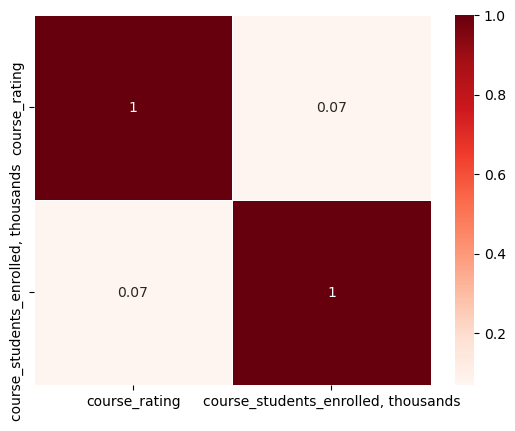

In [40]:
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, linewidth=0.5)
plt.show()

### Conclusion: 

As we see there is no correlation between courses ratings and student participation. That suggests that ratings are given 
exclusively based on participants personal opinion and not by student enrollment quantity.

### How many courses are there based on course difficulty:

In [41]:
courses_count = df.groupby("course_difficulty", as_index=False).agg(
    total_number=("course_difficulty", "count")
)
courses_count

,course_difficulty,total_number
0,Advanced,19
1,Beginner,487
2,Intermediate,198
3,Mixed,187


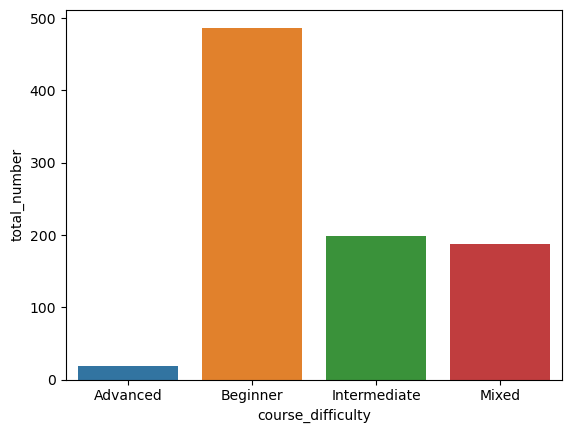

In [42]:
sns.barplot(data=courses_count, x="course_difficulty", y="total_number");

### Conclusion: 

As we can oserve most courses are provided are for beginners level (487 in total), 
with following almost Intermediate level (198 in total).

### How course ratings depend on complexity:

In [43]:
rating_count = pd.DataFrame(
    df.groupby(["course_rating", "course_difficulty"])["course_difficulty"].count()
)
rating_count

course_difficulty
course_rating course_difficulty                   
3.3           Mixed                              1
3.7           Intermediate                       1
3.9           Intermediate                       2
4.0           Intermediate                       2
4.1           Beginner                           1
4.2           Advanced                           1
              Beginner                           4
              Intermediate                       2
              Mixed                              3
4.3           Advanced                           1
              Beginner                          10
              Intermediate                       2
              Mixed                              2
4.4           Advanced                           2
              Beginner                          16
              Intermediate                      13
              Mixed                              3
4.5           Advanced                           5
              Beginner                          40
              Intermediate                      25
              Mixed                             10
4.6           Beginner                         107
              Intermediate                      32
              Mixed                             29
4.7           Advanced                           5
              Beginner                         141
              Intermediate                      60
              Mixed                             45
4.8           Advanced                           4
              Beginner                         129
              Intermediate                      46
              Mixed                             77
4.9           Advanced                           1
              Beginner                          38
              Intermediate                      12
              Mixed                             17
5.0           Beginner                           1
              Intermediate                       1

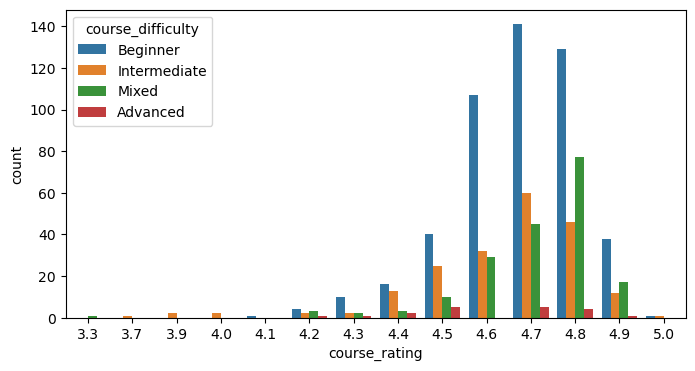

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x="course_rating", hue="course_difficulty", ax=ax);

### Conclusion: 

The plot gives a clear observation, that majority of highest ratings courses are of beginner level for 4.7 rating. 
There are few ratings that have not enough competitive data (in total only 1 or 2 courses). The second and third place in ratings are 4.8 and 4.9.

### How students are distributed based on course complexity:

In [45]:
student_count = (
    df.groupby("course_difficulty", as_index=False)
    .agg(student_num_thousand=("course_students_enrolled, thousands", "sum"))
    .sort_values(by="student_num_thousand", ascending=False)
)
student_count

,course_difficulty,student_num_thousand
1,Beginner,39921.8
3,Mixed,24989.4
2,Intermediate,14506.3
0,Advanced,1264.4


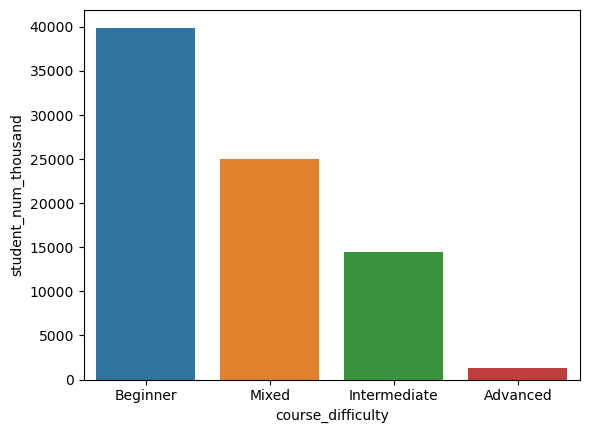

In [46]:
sns.barplot(data=student_count, x='course_difficulty', y='student_num_thousand');

### Conclusion:

As we observe most students choose beginner level (39_921_800 people in total). 
Since course ratings depend on how many students chooses the course, we can claim that the most active participants
are at beginners level.


### How the number of students is distributed based on course ratings

In [47]:
participants = (
    df.groupby("course_rating", as_index=False)
    .agg(student_number=("course_students_enrolled, thousands", "sum"))
    .sort_values(by="student_number", ascending=False)
)
participants

,course_rating,student_number
11,4.8,22335.6
10,4.7,20574.9
9,4.6,15783.2
12,4.9,11639.3
8,4.5,5962.0
7,4.4,2782.6
5,4.2,637.2
6,4.3,624.0
0,3.3,140.0
2,3.9,91.0


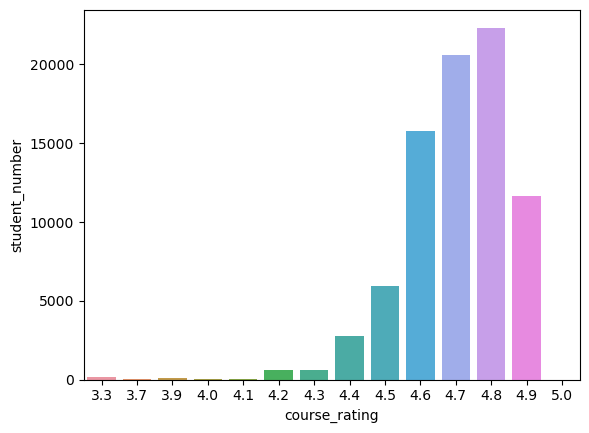

In [48]:
sns.barplot(
    data=participants, x="course_rating", y="student_number", errorbar=("ci", False)
);

### Conclusion:

As barplot shows, most students are grouped in rating 4.8. Overall most crowded ratings are also 4.7, 4.6, 4.9.
From our previous observation about how many courses these ratings have, we can conclude, that ratings do have correlation with 
number of participants.

## What are most popular words in the courses title:

* Our aim is to find the most repeated words in the title of the course, 
so that we can predict the main topic of the most popular courses.

Here we separate the title, split it and plase it in separate column:

In [49]:
df["name"] = df["course_title"].str.lower().str.strip().str.split()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,"course_students_enrolled, thousands",name
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3,"[(isc)², systems, security, certified, practit..."
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17.0,"[a, crash, course, in, causality:, inferring, ..."
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0,"[a, crash, course, in, data, science]"
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91.0,"[a, law, student's, toolkit]"
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320.0,"[a, life, of, happiness, and, fulfillment]"


Create a set of stop words, that we do not need to count;<br>
Iterrate each row and append the list by row_data.course_difficulty (first loop), 'repeated_word'(second loop);<br>
If final word is not a stop_word the list will be appended;<br>
Finally we create a new dataframe and if there are any null values in the repeated words, those values should be removed.  


In [50]:
stop_words = frozenset(
    [
        "the",
        "as",
        "is",
        "i",
        "it",
        "to",
        "and",
        "my",
        "this",
        "for",
        "have",
        "a",
        "but",
        "of",
        "on",
        "in",
        "that",
        "was",
        "so",
        "can",
        "you",
        "with",
        "advanced",
        "prep",
        "-",
        "1:",
        "introduction",
        "de",
        "&",
        "from",
        "y",
        "your",
        "what",
        "la",
        "an",
    ]
)

In [51]:
words = []
for data in df[["course_difficulty", "name"]].iterrows():
    row_data = data[1]
    for final_word in row_data[1]:
        if final_word not in stop_words:
            words.append((row_data.course_difficulty, final_word))
all_names = pd.DataFrame(words, columns=["course_difficulty", "repeated_word"])
data_set = all_names[all_names.repeated_word.str.len() > 0]
data_set.head(10)

,course_difficulty,repeated_word
0,Beginner,(isc)²
1,Beginner,systems
2,Beginner,security
3,Beginner,certified
4,Beginner,practitioner
5,Beginner,(sscp)
6,Intermediate,crash
7,Intermediate,course
8,Intermediate,causality:
9,Intermediate,inferring


We need to group our new data set according to 'course_difficulty';<br>
Count every 'reapeated_word' value;<br>
Convert the result into tabular format;<br>
Rename column name 'repeated_word' to 'counted words':

In [52]:
data_set = (
    data_set.groupby("course_difficulty")
    .repeated_word.value_counts()
    .to_frame()
    .rename(columns={"repeated_word": "counted words"})
)
data_set.head(10)

counted words
course_difficulty repeated_word               
Advanced          autodesk                   2
                  business                   2
                  cars                       2
                  certified                  2
                  data                       2
                  design                     2
                  exam                       2
                  ibm                        2
                  learning                   2
                  machine                    2

The function bellow allows to display the most popular word appearances in the course title:<br>


In [53]:
def display_top_words(records, index_lvl=0):
    final_result = (
        records.groupby(level=index_lvl)
        .apply(lambda records: records.nlargest(10, keep="first"))
        .reset_index(level=index_lvl, drop=True)
    )
    return final_result.to_frame()


display_top_words(data_set["counted words"])

counted words
course_difficulty repeated_word               
Advanced          autodesk                   2
                  business                   2
                  cars                       2
                  certified                  2
                  data                       2
                  design                     2
                  exam                       2
                  ibm                        2
                  learning                   2
                  machine                    2
Beginner          data                      33
                  management                29
                  business                  24
                  science                   24
                  health                    22
                  fundamentals              19
                  python                    18
                  social                    16
                  design                    15
                  digital                   14
Intermediate      data                      24
                  learning                  19
                  cloud                     18
                  google                    18
                  machine                   14
                  python                    11
                  business                   9
                  platform                   9
                  design                     8
                  development                8
Mixed             data                      10
                  management                 9
                  international              8
                  global                     7
                  law                        7
                  health                     6
                  english                    5
                  financial                  5
                  python                     5
                  science                    5

### Conclusion:

For a clear result, we have selected 10 words for each difficulty level in the title. It can be seen that the number of courses
by difficulty is also reflected in the resulting table:<br> 
* The Beginner level with the most courses has the most words counted. The most popular 4 words in the title are: data, management, business, science.<br> 
* The most popular words in the Intermediate level are: data, learning, cloud, google.<br> 
* Mixed level: data, management, international.<br>
* The most popular words at Advanced level are all the same value, probably because there are fewer courses at this level and
it would be incorrect to give an exact list of the top 4 words.<br>
In terms of key words, all levels are dominated by words in the field of computer science or data science.

# Conclusion:

The aim of this thesis was to determine which courses are the most popular on Coursera. The following conclusions can be drawn from the questions answered:
1. The most popular course rating is 4.8
2. The rating does not correlate with attendance. Although the number of students shows that both the ranking and the number of students in the ranking should have a correlation. This is probably not the case because ranking is not compulsory and not every student does it.
3. Most courses are designed for Beginner level and the courses at this level have the highest number of visitors.
4. Analysing the most popular words in the course titles, we can conclude that the most popular courses are in the fields of data , management and business.

# Improvement:

* The analysis of the database would be improved by a few additional parameters, such as: specifying the language 
    in which the courses are delivered, a clearer address of the institution organising the course, 
    which would help a deeper analysis by organisation, it's geography.<br>
* Further study of data visualisation will allow for clearer, more detailed plots.
* Further study of the code will help to simplify the extraction of information.